# importing libraries

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
# from keras.optimizers import Adam .
from tensorflow.keras.optimizers import Adam # - Works
from tensorflow.keras.callbacks import EarlyStopping
#from keras.utils import np_utils
from tensorflow.keras.layers import LSTM
from sklearn.model_selection import KFold, cross_val_score, train_test_split


In [7]:
df = pd.read_excel('Data Set.xlsx') #reading data excel file 

In [11]:
df

,Date,Time,Location,Item Name,Qty Total (Cup)
0,15/03/2021,09:07:26,Blus Boba IU,Brown Sugar Milk,1
1,NaN,10:22:42,Blus Boba IU,Brown Sugar Milk Tea,2
2,NaN,10:39:26,Blus Boba Sen Sok,Jasmine Green Tea,1
3,NaN,10:56:50,Blus Boba IU,Jasmine Green Tea,1
4,NaN,11:06:07,Blus Boba Sen Sok,Brown Sugar Milk Tea,1
...,...,...,...,...,...
30237,NaN,18:25:52,Blus Boba IU,Original Milk Tea,1
30238,NaN,18:57:43,Blus Boba Sen Sok,Passion Lime Green Tea,1
30239,NaN,19:24:58,Blu`s Boba St.51,Jasmine Green Tea,1
30240,21/01/2022 Total,NaN,NaN,NaN,126


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30242 entries, 0 to 30241
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             621 non-null    object
 1   Time             18754 non-null  object
 2   Location         23584 non-null  object
 3   Item Name        25096 non-null  object
 4   Qty Total (Cup)  30242 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.2+ MB


# Preprocessing Data

In [4]:
#df = df.loc[17:,:]

In [5]:
#df.reset_index(inplace = True )

In [6]:
#df.drop('index',axis = 1, inplace = True)

C:\Anaconda3\envs\test\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [7]:
df.columns = df.loc[0]

In [8]:
df.drop(df.index[0], inplace = True)

In [9]:
df.reset_index(inplace=True)

In [10]:
df.drop('index',axis = 1, inplace=True)

In [165]:
df.tail()

,Date,Item Name,Qty Total (Cup)
30235,21/01/2022,Strawberry Matcha Milk,1
30236,21/01/2022,Original Milk Tea,1
30237,21/01/2022,Original Milk Tea,1
30238,21/01/2022,Passion Lime Green Tea,1
30239,21/01/2022,Jasmine Green Tea,1


In [26]:
df.ffill(inplace=True)
df.head(110)

,Date,Time,Location,Item Name,Qty Total (Cup)
0,15/03/2021,09:07:26,Blus Boba IU,Brown Sugar Milk,1
1,15/03/2021,10:22:42,Blus Boba IU,Brown Sugar Milk Tea,2
2,15/03/2021,10:39:26,Blus Boba Sen Sok,Jasmine Green Tea,1
3,15/03/2021,10:56:50,Blus Boba IU,Jasmine Green Tea,1
4,15/03/2021,11:06:07,Blus Boba Sen Sok,Brown Sugar Milk Tea,1
...,...,...,...,...,...
105,15/03/2021 Total,20:00:08,Blu`s Boba St.51,Strawberry Matcha Milk,118
106,16/03/2021,09:59:24,Blu`s Boba St.51,Original Milk Tea,1
107,16/03/2021,09:59:24,Blu`s Boba St.51,Passion Lime Green Tea,1
108,16/03/2021,09:59:24,Blu`s Boba St.51 Total,Passion Lime Green Tea,2


In [29]:
df=df[~df['Date'].str.contains("Total")]
df.head(110)

,Date,Time,Location,Item Name,Qty Total (Cup)
0,15/03/2021,09:07:26,Blus Boba IU,Brown Sugar Milk,1
1,15/03/2021,10:22:42,Blus Boba IU,Brown Sugar Milk Tea,2
2,15/03/2021,10:39:26,Blus Boba Sen Sok,Jasmine Green Tea,1
3,15/03/2021,10:56:50,Blus Boba IU,Jasmine Green Tea,1
4,15/03/2021,11:06:07,Blus Boba Sen Sok,Brown Sugar Milk Tea,1
...,...,...,...,...,...
106,16/03/2021,09:59:24,Blu`s Boba St.51,Original Milk Tea,1
107,16/03/2021,09:59:24,Blu`s Boba St.51,Passion Lime Green Tea,1
108,16/03/2021,09:59:24,Blu`s Boba St.51 Total,Passion Lime Green Tea,2
109,16/03/2021,10:27:57,Blus Boba IU,Original Milk Tea,1


In [30]:
df=df[~df['Date'].str.contains("Total")]
df.head(107)

,Date,Time,Location,Item Name,Qty Total (Cup)
0,15/03/2021,09:07:26,Blus Boba IU,Brown Sugar Milk,1
1,15/03/2021,10:22:42,Blus Boba IU,Brown Sugar Milk Tea,2
2,15/03/2021,10:39:26,Blus Boba Sen Sok,Jasmine Green Tea,1
3,15/03/2021,10:56:50,Blus Boba IU,Jasmine Green Tea,1
4,15/03/2021,11:06:07,Blus Boba Sen Sok,Brown Sugar Milk Tea,1
...,...,...,...,...,...
102,15/03/2021,19:44:10,Blus Boba Sen Sok,Original Milk Tea,1
103,15/03/2021,19:56:40,Blus Boba Sen Sok,Original Milk Tea,3
104,15/03/2021,20:00:08,Blu`s Boba St.51,Strawberry Matcha Milk,2
106,16/03/2021,09:59:24,Blu`s Boba St.51,Original Milk Tea,1


In [34]:
df=df[['Date','Item Name',"Qty Total (Cup)"]]
df.head(40)

,Date,Item Name,Qty Total (Cup)
0,15/03/2021,Brown Sugar Milk,1
1,15/03/2021,Brown Sugar Milk Tea,2
2,15/03/2021,Jasmine Green Tea,1
3,15/03/2021,Jasmine Green Tea,1
4,15/03/2021,Brown Sugar Milk Tea,1
5,15/03/2021,Original Milk Tea,1
6,15/03/2021,Original Milk Tea,2
7,15/03/2021,Original Milk Tea,1
8,15/03/2021,Brown Sugar Matcha Milk,2
9,15/03/2021,Brown Sugar Milk Tea,1


In [16]:
# df.head(50)

In [35]:
df["Date"] = pd.to_datetime(df["Date"])
df["Date"]=df['Date'].dt.strftime('%d/%m/%Y')
sum_df = df.groupby(['Date','Item Name']).agg({'Qty Total (Cup)': 'sum'})
sum_df=sum_df.reset_index()
sum_df["Date"] = pd.to_datetime(sum_df["Date"],infer_datetime_format=True)
sum_df.sort_values(by=['Date'], inplace=True, ascending=True)
sum_df["Date"]=sum_df['Date'].dt.strftime('%Y-%m-%d')
sum_df.head(10)

<ipython-input-35-e6a9f1a28ebe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Date"] = pd.to_datetime(df["Date"])
<ipython-input-35-e6a9f1a28ebe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Date"]=df['Date'].dt.strftime('%d/%m/%Y')


,Date,Item Name,Qty Total (Cup)
1789,2021-03-15,Brown Sugar Milk,9
1795,2021-03-15,Strawberry Matcha Milk,30
1794,2021-03-15,Passion Lime Green Tea,16
1793,2021-03-15,Original Milk Tea,40
1791,2021-03-15,Jasmine Green Tea,6
1790,2021-03-15,Brown Sugar Milk Tea,41
1788,2021-03-15,Brown Sugar Matcha Milk,5
1792,2021-03-15,Jasmine Milk Tea,30
1927,2021-03-16,Passion Lime Green Tea,10
1920,2021-03-16,Black Tea,2


In [39]:
sum_df = sum_df.reset_index(drop=True)
sum_df

,Date,Item Name,Qty Total (Cup)
0,2021-03-15,Brown Sugar Milk,9
1,2021-03-15,Strawberry Matcha Milk,30
2,2021-03-15,Passion Lime Green Tea,16
3,2021-03-15,Original Milk Tea,40
4,2021-03-15,Jasmine Green Tea,6
...,...,...,...
3906,2022-01-21,Brown Sugar Matcha Milk,13
3907,2022-01-21,Black Tea,1
3908,2022-01-21,Thai Milk Tea,5
3909,2022-01-21,Jasmine Milk Tea,9


In [40]:
final_df = sum_df.copy()

In [41]:
final_df = final_df.groupby(['Item Name']).agg({'Qty Total (Cup)': 'sum'})

In [42]:
final_df

,Qty Total (Cup)
Item Name,
Black Tea,274
Black Tea Milk Cream,214
Brown Sugar Matcha Milk,2174
Brown Sugar Milk,2828
Brown Sugar Milk Tea,10785
Caramel Crunchy Milk,398
Jasmine Green Tea,858
Jasmine Milk Cream,270
Jasmine Milk Tea,5184


# Sales record of Brown Sugar Milk Tea

In [43]:
data = sum_df[sum_df['Item Name'].str.contains("Brown Sugar Milk Tea")]
data

,Date,Item Name,Qty Total (Cup)
5,2021-03-15,Brown Sugar Milk Tea,41
12,2021-03-16,Brown Sugar Milk Tea,77
17,2021-03-17,Brown Sugar Milk Tea,49
30,2021-03-18,Brown Sugar Milk Tea,27
43,2021-03-19,Brown Sugar Milk Tea,35
...,...,...,...
3848,2022-01-17,Brown Sugar Milk Tea,44
3866,2022-01-18,Brown Sugar Milk Tea,22
3877,2022-01-19,Brown Sugar Milk Tea,22
3891,2022-01-20,Brown Sugar Milk Tea,35


In [44]:
data.rename(columns = {'Date':'date','Qty Total (Cup)':'sales'}, inplace = True)
df_sales = data.copy()
df_sales = df_sales[['date','sales']]

C:\Users\Osama\Anaconda3\envs\newenv\lib\site-packages\pandas\core\frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [47]:
df_sales.reset_index(inplace=True, drop=True)
df_sales

,date,sales
0,2021-03-15,41
1,2021-03-16,77
2,2021-03-17,49
3,2021-03-18,27
4,2021-03-19,35
...,...,...
305,2022-01-17,44
306,2022-01-18,22
307,2022-01-19,22
308,2022-01-20,35


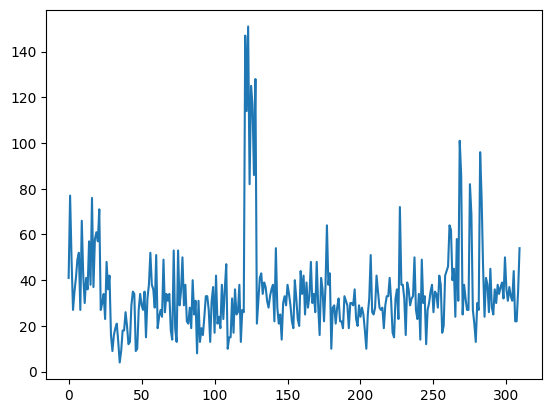

In [154]:
df_sales['sales'].plot()
plt.show()

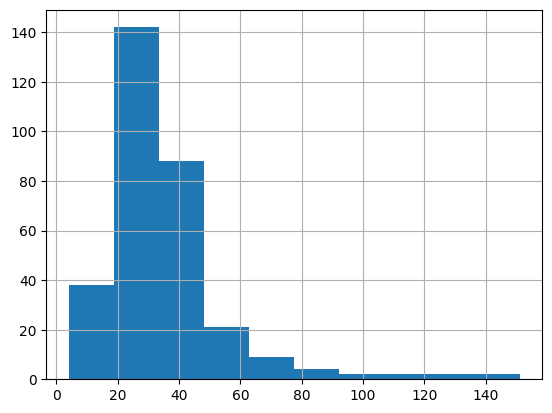

In [166]:
df_sales['sales'].hist()
plt.show()

In [51]:
### Testing For Stationarity
from statsmodels.tsa.stattools import adfuller

In [52]:
#Ho: It is non stationary
#H1: It is stationary
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [53]:
adfuller_test(df_sales['sales'])

ADF Test Statistic : -4.730906701332345
p-value : 7.359415637479622e-05
#Lags Used : 7
Number of Observations Used : 302
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [54]:
#create a new dataframe to model the difference
df_diff = df_sales.copy()

In [97]:
df_sales['Seasonal First Difference']=df_sales['sales'] - df_sales['sales'].shift(7)

In [100]:
## Again test dickey fuller test
adfuller_test(df_sales['Seasonal First Difference'].dropna())

ADF Test Statistic : -4.349651965097012
p-value : 0.00036402914776756585
#Lags Used : 7
Number of Observations Used : 252
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


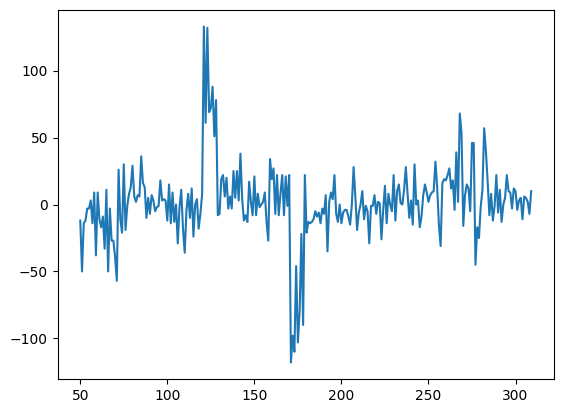

In [101]:
df_sales['Seasonal First Difference'].plot()
plt.show()

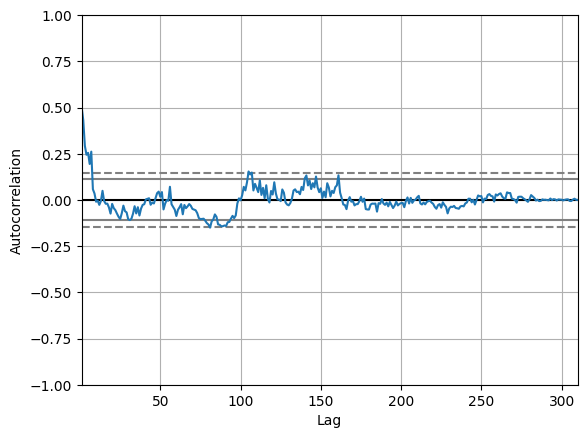

In [58]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_sales['sales'])
plt.show()

In [67]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

C:\Users\Osama\Anaconda3\envs\newenv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


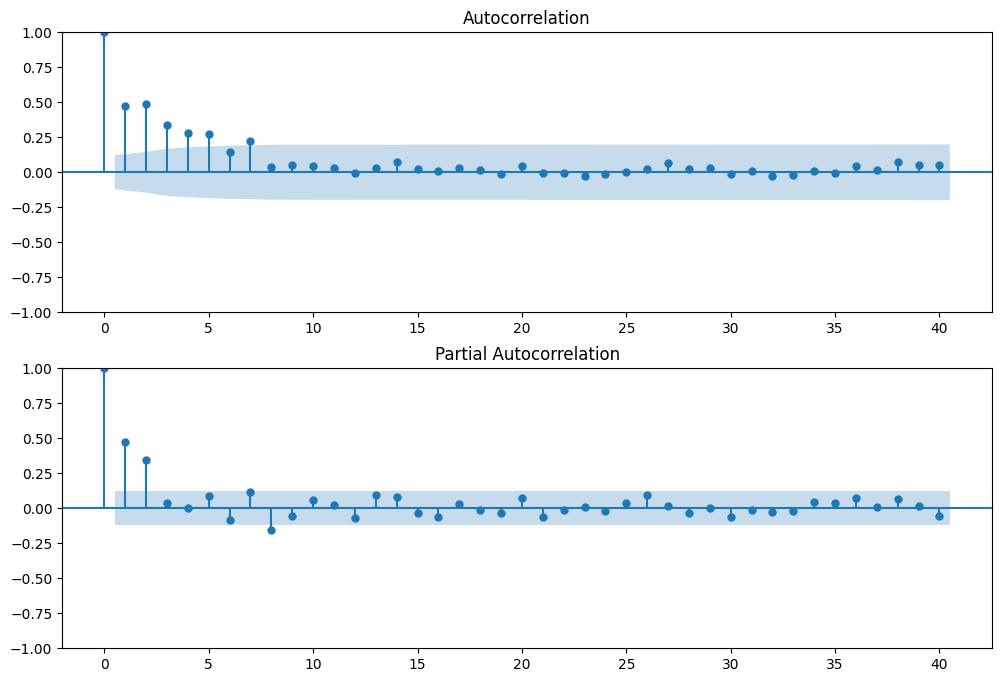

In [102]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df_sales['Seasonal First Difference'].iloc[51:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df_sales['Seasonal First Difference'].iloc[51:],lags=40,ax=ax2)
plt.show(fig)

In [73]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima.model import ARIMA

In [103]:
model=ARIMA(df_sales['sales'],order=(1,1,0))
model_fit=model.fit()

In [104]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  sales   No. Observations:                  310
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -1332.338
Date:                Thu, 24 Feb 2022   AIC                           2668.677
Time:                        01:24:57   BIC                           2676.144
Sample:                             0   HQIC                          2671.662
                                - 310                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4335      0.042    -10.257      0.000      -0.516      -0.351
sigma2       325.3850     11.554     28.163      0.000     302.740     348.030
===================================================================================
Ljung-Box (L1) (Q):                   1.01   Jarque-Bera (JB):              1010.32
Prob(Q):                              0.32   Prob(JB):                         0.00
Heteroskedasticity (H):               1.63   Skew:                             0.63
Prob(H) (two-sided):                  0.01   Kurtosis:                        11.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

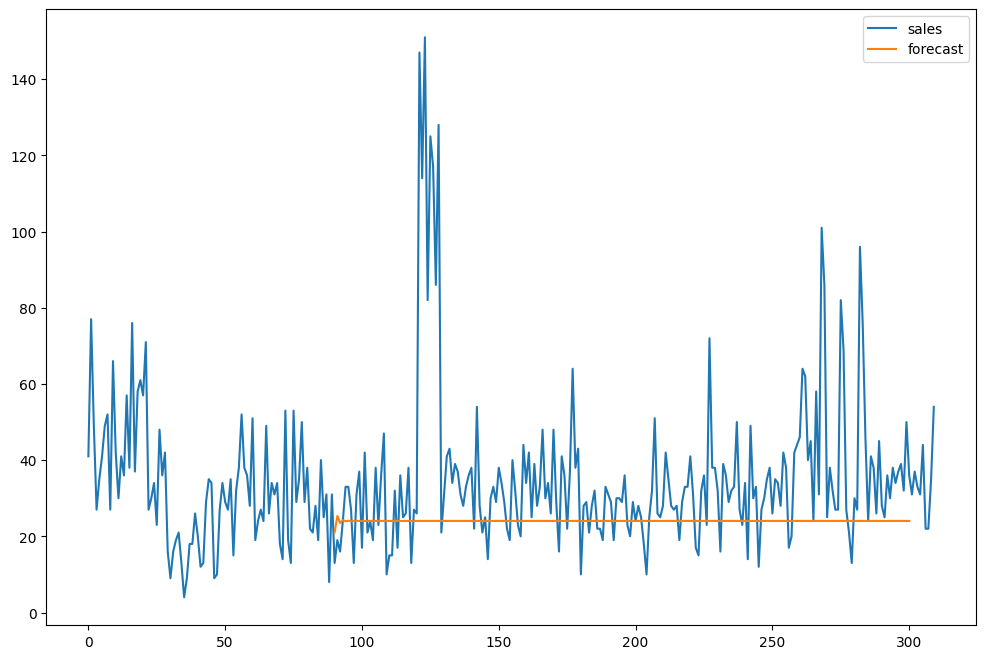

In [105]:
df_sales['forecast']=model_fit.predict(start=90,end=300,dynamic=True)
df_sales[['sales','forecast']].plot(figsize=(12,8))
plt.show()

In [106]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df_sales['sales'],order=(1, 1, 1),seasonal_order=(1,1,1,50))
results=model.fit()

C:\Users\Osama\Anaconda3\envs\newenv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


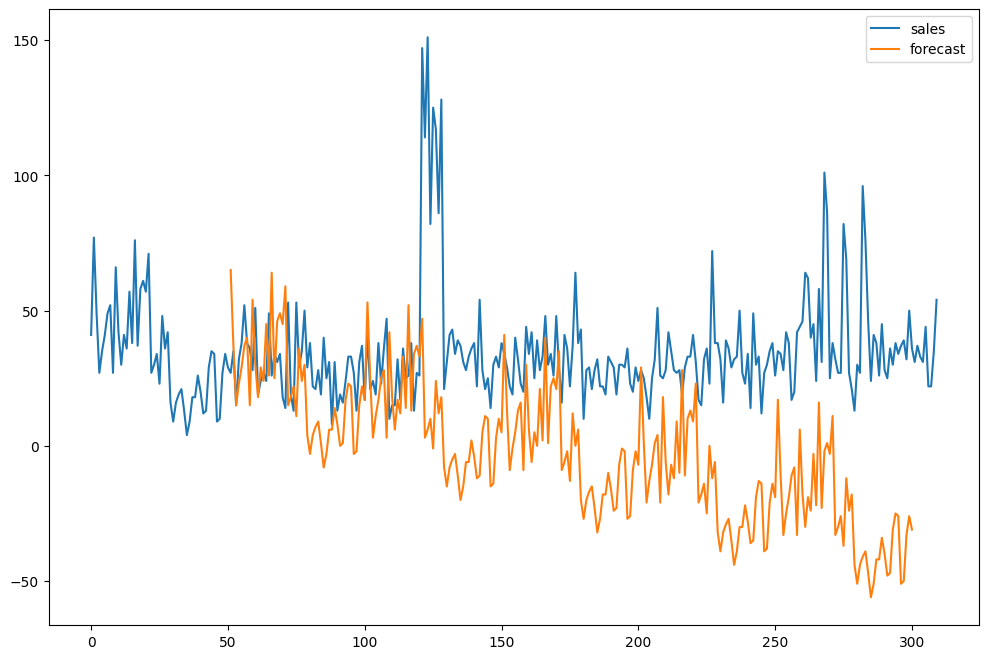

In [110]:
df_sales['forecast']=results.predict(start=51,end=300,dynamic=True)
df_sales[['sales','forecast']].plot(figsize=(12,8))
plt.show()

In [112]:
#add previous sales to the next row
df_diff['prev_sales'] = df_diff['sales'].shift(1)
#drop the null values and calculate the difference
df_diff = df_diff.dropna()

df_diff['diff'] = (df_diff['sales'] - df_diff['prev_sales'])

#create new dataframe from transformation from time series to supervised
df_supervised = df_diff.drop(['prev_sales'],axis=1)
df_supervised= df_supervised.append(pd.DataFrame({'date': pd.date_range(start=df_supervised.date.iloc[-1], periods=6, freq='D', closed='right')}))
#adding lags
for inc in range(1,13):
    field_name = 'lag_' + str(inc)
    df_supervised[field_name] = df_supervised['diff'].shift(inc)
    
#drop null values
df_supervised = df_supervised.dropna().reset_index(drop=True)


<ipython-input-112-6298632f7d97>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diff['diff'] = (df_diff['sales'] - df_diff['prev_sales'])


In [114]:
df_supervised

,date,sales,diff,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12
0,2021-03-28,36.0,-5.0,11.0,-12.0,-24.0,39.0,-25.0,3.0,8.0,6.0,8.0,-22.0,-28.0,36.0
1,2021-03-29,57.0,21.0,-5.0,11.0,-12.0,-24.0,39.0,-25.0,3.0,8.0,6.0,8.0,-22.0,-28.0
2,2021-03-30,38.0,-19.0,21.0,-5.0,11.0,-12.0,-24.0,39.0,-25.0,3.0,8.0,6.0,8.0,-22.0
3,2021-03-31,76.0,38.0,-19.0,21.0,-5.0,11.0,-12.0,-24.0,39.0,-25.0,3.0,8.0,6.0,8.0
4,2021-04-01,37.0,-39.0,38.0,-19.0,21.0,-5.0,11.0,-12.0,-24.0,39.0,-25.0,3.0,8.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,2022-01-17,44.0,13.0,-2.0,-4.0,6.0,-5.0,-14.0,18.0,-7.0,2.0,3.0,-4.0,8.0,-6.0
293,2022-01-18,22.0,-22.0,13.0,-2.0,-4.0,6.0,-5.0,-14.0,18.0,-7.0,2.0,3.0,-4.0,8.0
294,2022-01-19,22.0,0.0,-22.0,13.0,-2.0,-4.0,6.0,-5.0,-14.0,18.0,-7.0,2.0,3.0,-4.0
295,2022-01-20,35.0,13.0,0.0,-22.0,13.0,-2.0,-4.0,6.0,-5.0,-14.0,18.0,-7.0,2.0,3.0


In [115]:
extraDates=pd.DataFrame({'date': pd.date_range(start=df_supervised.date.iloc[-1], periods=6, freq='d', closed='right')})
fdf=df_supervised.append(extraDates)
fdf['date'] = pd.to_datetime(fdf['date'], errors='coerce')
fdf["date"]=fdf['date'].dt.strftime('%Y-%m-%d')
fdf=fdf.reset_index()
fdf = fdf.drop(['index'],axis=1)

fdf.tail(20)
fdf=fdf.fillna(0)

In [116]:
fdf

,date,sales,diff,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12
0,2021-03-28,36.0,-5.0,11.0,-12.0,-24.0,39.0,-25.0,3.0,8.0,6.0,8.0,-22.0,-28.0,36.0
1,2021-03-29,57.0,21.0,-5.0,11.0,-12.0,-24.0,39.0,-25.0,3.0,8.0,6.0,8.0,-22.0,-28.0
2,2021-03-30,38.0,-19.0,21.0,-5.0,11.0,-12.0,-24.0,39.0,-25.0,3.0,8.0,6.0,8.0,-22.0
3,2021-03-31,76.0,38.0,-19.0,21.0,-5.0,11.0,-12.0,-24.0,39.0,-25.0,3.0,8.0,6.0,8.0
4,2021-04-01,37.0,-39.0,38.0,-19.0,21.0,-5.0,11.0,-12.0,-24.0,39.0,-25.0,3.0,8.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,2022-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
298,2022-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
299,2022-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
300,2022-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
# Import statsmodels.formula.api
import statsmodels.formula.api as smf 

# Define the regression formula
model = smf.ols(formula='diff ~ lag_1', data=df_supervised)

# Fit the regression
model_fit = model.fit()

# Extract the adjusted r-squared
regression_adj_rsq = model_fit.rsquared_adj
print(regression_adj_rsq)

0.3117113448935508


In [27]:

# Import statsmodels.formula.api
import statsmodels.formula.api as smf 

# Define the regression formula
model = smf.ols(formula='diff ~ lag_1 + lag_2 + lag_3 + lag_4 + lag_5', data=df_supervised)

# Fit the regression
model_fit = model.fit()

# Extract the adjusted r-squared
regression_adj_rsq = model_fit.rsquared_adj
print(regression_adj_rsq)

0.38241751925491674


In [28]:
# Import statsmodels.formula.api
import statsmodels.formula.api as smf 

# Define the regression formula
model = smf.ols(formula='diff ~ lag_1 + lag_2 + lag_3 + lag_4 + lag_5 + lag_6 + lag_7 + lag_8 + lag_9 + lag_10 + lag_11 + lag_12', data=df_supervised)

# Fit the regression
model_fit = model.fit()

# Extract the adjusted r-squared
regression_adj_rsq = model_fit.rsquared_adj
print(regression_adj_rsq)

0.3855736197308749


In [117]:
#import MinMaxScaler and create a new dataframe for LSTM model
from sklearn.preprocessing import MinMaxScaler
df_model = fdf.drop(['sales','date'],axis=1)

In [118]:
df_model

,diff,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12
0,-5.0,11.0,-12.0,-24.0,39.0,-25.0,3.0,8.0,6.0,8.0,-22.0,-28.0,36.0
1,21.0,-5.0,11.0,-12.0,-24.0,39.0,-25.0,3.0,8.0,6.0,8.0,-22.0,-28.0
2,-19.0,21.0,-5.0,11.0,-12.0,-24.0,39.0,-25.0,3.0,8.0,6.0,8.0,-22.0
3,38.0,-19.0,21.0,-5.0,11.0,-12.0,-24.0,39.0,-25.0,3.0,8.0,6.0,8.0
4,-39.0,38.0,-19.0,21.0,-5.0,11.0,-12.0,-24.0,39.0,-25.0,3.0,8.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
298,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
299,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [120]:
#split train and test set
train_set, test_set = df_model[0:-50].values, df_model[-50:].values

In [121]:
#apply Min Max Scaler
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler = scaler.fit(train_set)
# reshape training set
train_set = train_set.reshape(train_set.shape[0], train_set.shape[1])
train_set_scaled = scaler.transform(train_set)

# reshape test set
test_set = test_set.reshape(test_set.shape[0], test_set.shape[1])
test_set_scaled = scaler.transform(test_set)

In [122]:
train_set_scaled

array([[-0.10526316,  0.03508772, -0.16666667, ..., -0.25438596,
        -0.30701754,  0.25438596],
       [ 0.12280702, -0.10526316,  0.03508772, ...,  0.00877193,
        -0.25438596, -0.30701754],
       [-0.22807018,  0.12280702, -0.10526316, ..., -0.00877193,
         0.00877193, -0.25438596],
       ...,
       [-0.07894737,  0.09649123, -0.04385965, ..., -0.07017544,
         0.01754386, -0.16666667],
       [-0.25438596, -0.07894737,  0.09649123, ..., -0.11403509,
        -0.07017544,  0.01754386],
       [-0.01754386, -0.25438596, -0.07894737, ...,  0.06140351,
        -0.11403509, -0.07017544]])

In [123]:
X_train, y_train = train_set_scaled[:, 1:], train_set_scaled[:, 0:1]
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])

In [124]:
X_test, y_test = test_set_scaled[:, 1:], test_set_scaled[:, 0:1]
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Training LSTM  model

In [128]:
model = Sequential()
model.add(LSTM(128, batch_input_shape=(1, X_train.shape[1], X_train.shape[2]), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['mae'])
model.fit(X_train, y_train, epochs=100, batch_size=1, validation_data=(X_test, y_test),verbose=1, shuffle=False)

Epoch 1/100
252/252 [==============================] - 8s 8ms/step - loss: 0.0254 - mae: 0.1102 - val_loss: 0.0338 - val_mae: 0.1209
Epoch 2/100
252/252 [==============================] - 1s 4ms/step - loss: 0.0221 - mae: 0.1051 - val_loss: 0.0341 - val_mae: 0.1243
Epoch 3/100
252/252 [==============================] - 1s 4ms/step - loss: 0.0209 - mae: 0.1039 - val_loss: 0.0345 - val_mae: 0.1265
Epoch 4/100
252/252 [==============================] - 1s 4ms/step - loss: 0.0200 - mae: 0.1019 - val_loss: 0.0346 - val_mae: 0.1278
Epoch 5/100
252/252 [==============================] - 1s 4ms/step - loss: 0.0193 - mae: 0.1002 - val_loss: 0.0346 - val_mae: 0.1284
Epoch 6/100
252/252 [==============================] - 1s 4ms/step - loss: 0.0187 - mae: 0.0983 - val_loss: 0.0341 - val_mae: 0.1287
Epoch 7/100
252/252 [==============================] - 1s 4ms/step - loss: 0.0184 - mae: 0.0981 - val_loss: 0.0344 - val_mae: 0.1290
Epoch 8/100
252/252 [==============================] - 1s 4ms/step - 

252/252 [==============================] - 1s 4ms/step - loss: 0.0135 - mae: 0.0827 - val_loss: 0.0391 - val_mae: 0.1420
Epoch 63/100
252/252 [==============================] - 1s 4ms/step - loss: 0.0131 - mae: 0.0803 - val_loss: 0.0403 - val_mae: 0.1424
Epoch 64/100
252/252 [==============================] - 1s 4ms/step - loss: 0.0129 - mae: 0.0793 - val_loss: 0.0353 - val_mae: 0.1372
Epoch 65/100
252/252 [==============================] - 1s 4ms/step - loss: 0.0134 - mae: 0.0812 - val_loss: 0.0440 - val_mae: 0.1506
Epoch 66/100
252/252 [==============================] - 1s 4ms/step - loss: 0.0130 - mae: 0.0797 - val_loss: 0.0396 - val_mae: 0.1416
Epoch 67/100
252/252 [==============================] - 1s 4ms/step - loss: 0.0133 - mae: 0.0822 - val_loss: 0.0448 - val_mae: 0.1518
Epoch 68/100
252/252 [==============================] - 1s 4ms/step - loss: 0.0127 - mae: 0.0782 - val_loss: 0.0428 - val_mae: 0.1464
Epoch 69/100
252/252 [==============================] - 1s 4ms/step - loss:

In [129]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [131]:
from tensorflow.keras.models import model_from_json
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
model=loaded_model

Loaded model from disk


In [152]:
X_test

array([[[-0.01754386, -0.25438596, -0.07894737,  0.09649123,
         -0.04385965, -0.04385965,  0.13157895, -0.03508772,
         -0.24561404, -0.09649123,  0.06140351, -0.11403509]],

       [[-0.24561404, -0.01754386, -0.25438596, -0.07894737,
          0.09649123, -0.04385965, -0.04385965,  0.13157895,
         -0.03508772, -0.24561404, -0.09649123,  0.06140351]],

       [[ 0.23684211, -0.24561404, -0.01754386, -0.25438596,
         -0.07894737,  0.09649123, -0.04385965, -0.04385965,
          0.13157895, -0.03508772, -0.24561404, -0.09649123]],

       [[-0.29824561,  0.23684211, -0.24561404, -0.01754386,
         -0.25438596, -0.07894737,  0.09649123, -0.04385965,
         -0.04385965,  0.13157895, -0.03508772, -0.24561404]],

       [[ 0.55263158, -0.29824561,  0.23684211, -0.24561404,
         -0.01754386, -0.25438596, -0.07894737,  0.09649123,
         -0.04385965, -0.04385965,  0.13157895, -0.03508772]],

       [[-0.19298246,  0.55263158, -0.29824561,  0.23684211,
         

In [132]:
y_pred = model.predict(X_test,batch_size=1)
y_pred

array([[-0.19426742],
       [ 0.08563098],
       [-0.12796272],
       [ 0.09019718],
       [-0.33101225],
       [ 0.02713696],
       [ 0.07267161],
       [-0.4585251 ],
       [-0.10988297],
       [ 0.2395351 ],
       [ 0.34451222],
       [-0.5141647 ],
       [ 0.10898753],
       [ 0.5466516 ],
       [-0.39675447],
       [-0.03248065],
       [-0.00368804],
       [ 0.19163568],
       [-0.21435645],
       [ 0.09756984],
       [-0.03240133],
       [-0.29845688],
       [-0.11376406],
       [ 0.09617096],
       [ 0.31449845],
       [-0.2623861 ],
       [-0.0241951 ],
       [ 0.27622744],
       [-0.09020707],
       [-0.05379892],
       [-0.10687528],
       [-0.02467952],
       [-0.12664379],
       [-0.07834017],
       [-0.05133862],
       [-0.12994622],
       [-0.0228193 ],
       [-0.04707501],
       [-0.00748228],
       [ 0.00504001],
       [ 0.01486387],
       [-0.08503373],
       [ 0.06510815],
       [ 0.04969979],
       [-0.01686999],
       [ 0

In [133]:
#reshape y_pred
y_pred = y_pred.reshape(y_pred.shape[0], 1, y_pred.shape[1])

In [134]:
import numpy as np

In [135]:
#rebuild test set for inverse transform
pred_test_set = []
for index in range(0,len(y_pred)):
    print(np.concatenate([y_pred[index],X_test[index]],axis=1))
    pred_test_set.append(np.concatenate([y_pred[index],X_test[index]],axis=1))

[[-0.19426742 -0.01754386 -0.25438596 -0.07894737  0.09649123 -0.04385965
  -0.04385965  0.13157895 -0.03508772 -0.24561404 -0.09649123  0.06140351
  -0.11403509]]
[[ 0.08563098 -0.24561404 -0.01754386 -0.25438596 -0.07894737  0.09649123
  -0.04385965 -0.04385965  0.13157895 -0.03508772 -0.24561404 -0.09649123
   0.06140351]]
[[-0.12796272  0.23684211 -0.24561404 -0.01754386 -0.25438596 -0.07894737
   0.09649123 -0.04385965 -0.04385965  0.13157895 -0.03508772 -0.24561404
  -0.09649123]]
[[ 0.09019718 -0.29824561  0.23684211 -0.24561404 -0.01754386 -0.25438596
  -0.07894737  0.09649123 -0.04385965 -0.04385965  0.13157895 -0.03508772
  -0.24561404]]
[[-0.33101225  0.55263158 -0.29824561  0.23684211 -0.24561404 -0.01754386
  -0.25438596 -0.07894737  0.09649123 -0.04385965 -0.04385965  0.13157895
  -0.03508772]]
[[ 0.02713696 -0.19298246  0.55263158 -0.29824561  0.23684211 -0.24561404
  -0.01754386 -0.25438596 -0.07894737  0.09649123 -0.04385965 -0.04385965
   0.13157895]]
[[ 0.07267161 -0

In [136]:
#reshape pred_test_set
pred_test_set = np.array(pred_test_set)
pred_test_set = pred_test_set.reshape(pred_test_set.shape[0], pred_test_set.shape[2])

In [137]:
#inverse transform
pred_test_set_inverted = scaler.inverse_transform(pred_test_set)

In [142]:
#create dataframe that shows the predicted sales
result_list = []
sales_dates = list(df_sales[-51:].date)
act_sales = list(df_sales[-51:].sales)
# pred_test_set_inverted[index][0] 

In [143]:
sales_dates

['2021-12-02',
 '2021-12-03',
 '2021-12-04',
 '2021-12-05',
 '2021-12-06',
 '2021-12-07',
 '2021-12-08',
 '2021-12-09',
 '2021-12-10',
 '2021-12-11',
 '2021-12-12',
 '2021-12-13',
 '2021-12-14',
 '2021-12-15',
 '2021-12-16',
 '2021-12-17',
 '2021-12-18',
 '2021-12-19',
 '2021-12-20',
 '2021-12-21',
 '2021-12-22',
 '2021-12-23',
 '2021-12-24',
 '2021-12-25',
 '2021-12-26',
 '2021-12-27',
 '2021-12-28',
 '2021-12-29',
 '2021-12-30',
 '2021-12-31',
 '2022-01-01',
 '2022-01-02',
 '2022-01-03',
 '2022-01-04',
 '2022-01-05',
 '2022-01-06',
 '2022-01-07',
 '2022-01-08',
 '2022-01-09',
 '2022-01-10',
 '2022-01-11',
 '2022-01-12',
 '2022-01-13',
 '2022-01-14',
 '2022-01-15',
 '2022-01-16',
 '2022-01-17',
 '2022-01-18',
 '2022-01-19',
 '2022-01-20',
 '2022-01-21']

In [144]:
for index in range(0,len(pred_test_set_inverted)):
    result_dict = {}
    print(index)
    result_dict['pred_value'] = int(pred_test_set_inverted[index][0] + act_sales[index])
    result_dict['date'] = sales_dates[index+1]
    result_list.append(result_dict)
df_result = pd.DataFrame(result_list)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [145]:
#merge with actual sales dataframe
df_sales_pred = pd.merge(df_sales,df_result,on='date',how='left')

In [150]:
df_sales_pred.tail(50)

,date,sales,forecast,Seasonal First Difference,pred_value
260,2021-12-03,46,-17.934454,18.0,28.0
261,2021-12-04,64,-29.930025,22.0,62.0
262,2021-12-05,62,-18.936515,27.0,56.0
263,2021-12-06,40,-23.931392,12.0,79.0
264,2021-12-07,45,-2.941555,18.0,9.0
265,2021-12-08,24,-21.927624,-4.0,55.0
266,2021-12-09,58,16.051245,39.0,39.0
267,2021-12-10,31,-22.925805,2.0,12.0
268,2021-12-11,101,-1.937705,68.0,25.0
269,2021-12-12,86,1.062183,53.0,135.0


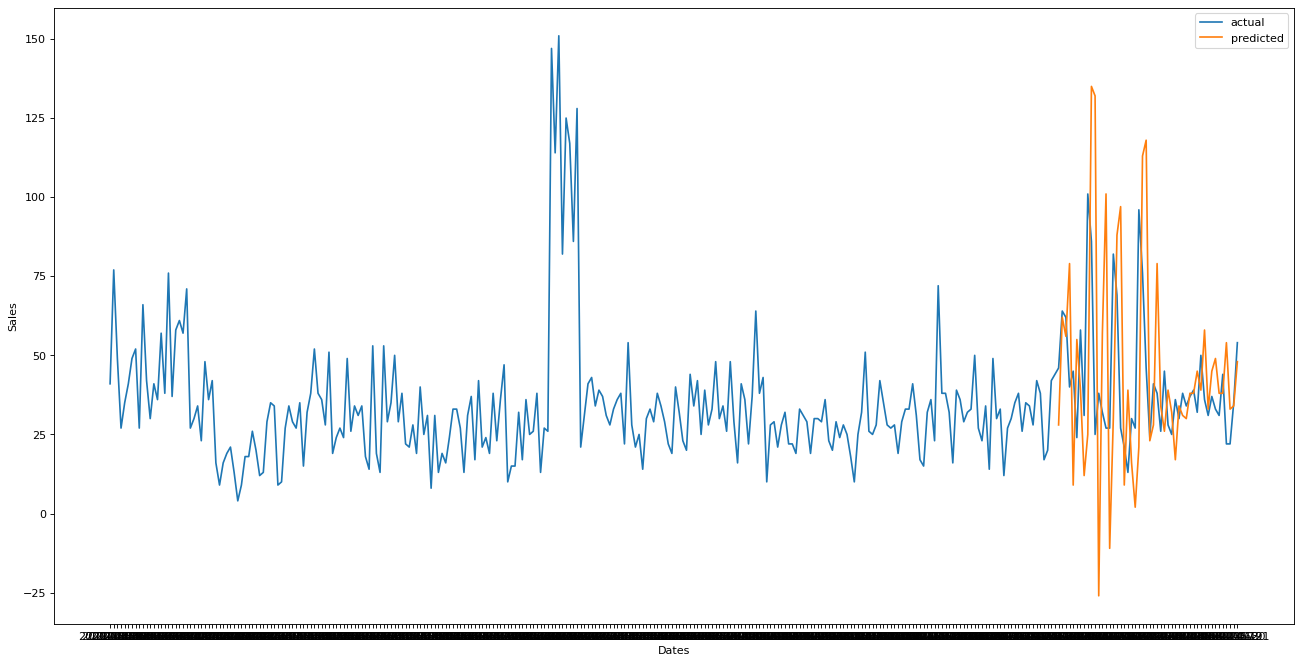

In [151]:
from matplotlib.pyplot import figure

figure(figsize=(20, 10), dpi=80)
plt.plot(df_sales_pred['date'], df_sales_pred['sales'], label = "actual")
plt.plot(df_sales_pred['date'], df_sales_pred['pred_value'], label = "predicted")
# plt.plot(x, y, label = "line 1")
# plt.plot(y, x, label = "line 2")
plt.xlabel("Dates")
plt.ylabel("Sales")
plt.legend()
plt.show()
